In [2]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [4]:
customerreview = pd.read_csv('Opinion Mining Data.csv') 
customerreview

,Reviewer Name,Review Date,Review Text
0,Luc D.,2025-04-01,Flight of the 26th of October from Delhi to Pa...
1,Neeraj S,2025-01-04,(UK955/08Nov25/PNR : NLAYRX / seat 14B) Left a...
2,Tapani U,2025-01-10,What a fantastic flight! Chennai (Madras) - Ne...
3,Tour10949987829,2025-01-06,I never travel in this airline. Mumbai - New D...
4,Sneha Kumar,2025-01-25,In-flight meal was better than expected. Good ...
...,...,...,...
288,Harsh Vardhan,2015-11-12,I flew Guwahati to Delhi return with Vistara i...
289,Yashasvi Makwana,2015-10-21,It was my first trip with Vistara. I had 9 kg ...
290,Sameer Phatak,2015-10-12,Mumbai to Delhi with Vistara. My check in proc...
291,Shivam Negi,2015-09-26,My third Vistara flight and using Premium Econ...


In [5]:
Feedback = ""

In [6]:
sentiment = SentimentIntensityAnalyzer()
for index, row in customerreview.iterrows():
    print("***Analysis start")
    print(row["Review Text"])
    Feedback = Feedback + row["Review Text"]
    sent_1 = sentiment.polarity_scores(row["Review Text"])
    print(sent_1)
    print("***Analysis end")
    print('<========================================>')

***Analysis start
Flight of the 26th of October from Delhi to Paris Good flight Good service but terrible hygiene! In my disposible coffee cup I found a worm attached to the side, after I had drunk it. Result 5 months of doctor visits. My flight number was UK21 and I sat on seat 11E in the tail of the plane. If anyone wants to sack the hostess... please do....
{'neg': 0.094, 'neu': 0.794, 'pos': 0.112, 'compound': -0.3054}
***Analysis end
<========================================>
***Analysis start
(UK955/08Nov25/PNR : NLAYRX / seat 14B) Left an item of personal importance in front seat pouch but did not succeed in getting back my thing; despite options after options of having to place my request with ground crew, at terminal staff and tele-customer care. Learnt a lesson to not trust what seems like a simple request for support, will be followed through once one has disembarked the plane.
{'neg': 0.085, 'neu': 0.758, 'pos': 0.157, 'compound': 0.7055}
***Analysis end
<==================

In [7]:
tbl=customerreview['sentiment_score'] = customerreview['Review Text'].apply(lambda x: sentiment.polarity_scores(x)['compound'])
customerreview['sentiment_category'] = customerreview['sentiment_score'].apply(
    lambda score: 'Positive' if score >= 0.05 else ('Negative' if score <= -0.05 else 'Neutral')
)

In [8]:
customerreview[['Review Text', 'sentiment_score', 'sentiment_category']]

,Review Text,sentiment_score,sentiment_category
0,Flight of the 26th of October from Delhi to Pa...,-0.3054,Negative
1,(UK955/08Nov25/PNR : NLAYRX / seat 14B) Left a...,0.7055,Positive
2,What a fantastic flight! Chennai (Madras) - Ne...,0.9472,Positive
3,I never travel in this airline. Mumbai - New D...,-0.7574,Negative
4,In-flight meal was better than expected. Good ...,0.7263,Positive
...,...,...,...
288,I flew Guwahati to Delhi return with Vistara i...,0.9710,Positive
289,It was my first trip with Vistara. I had 9 kg ...,0.7992,Positive
290,Mumbai to Delhi with Vistara. My check in proc...,0.9476,Positive
291,My third Vistara flight and using Premium Econ...,0.9432,Positive


In [9]:
def plot_speech(wordcloud):
    plt.figure(figsize=(12, 12))
    plt.imshow(wordcloud)
    plt.axis("off");

In [10]:
wordcloud = WordCloud(width = 500, height = 500, random_state=1, background_color='white', stopwords = STOPWORDS, min_font_size = 10).generate(Feedback)
wordcloud

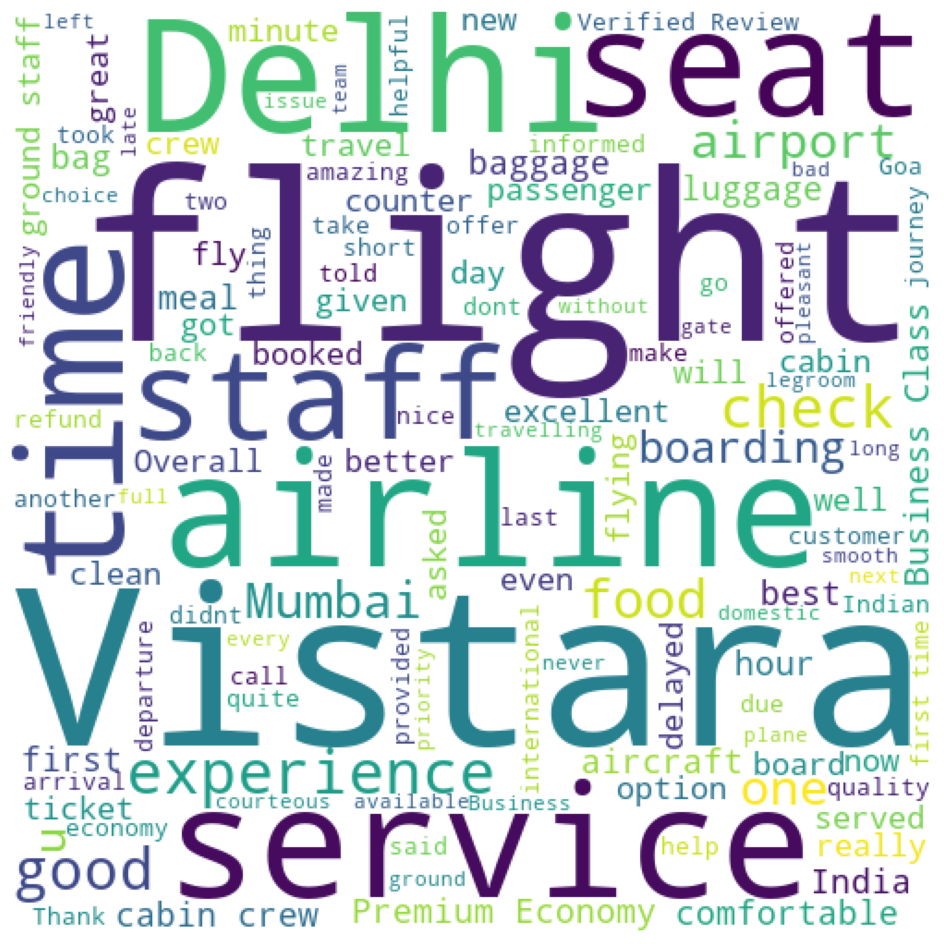

In [11]:
plot_speech(wordcloud)
